##Facial Recognition
This lab will show the basics of using Eigenfaces to match images of faces.

In [1]:
%matplotlib inline 
#makes all plots show as inline plots

In [2]:
import numpy as np
from scipy import linalg as la
from os import walk
from scipy.ndimage import imread
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import random

class FacialRec:
     ##########Members##########
     #   F, mu, Fbar, and U
     ###########################
     def __init__(self,path):
         self.initFaces(path)
         self.initMeanImage()
         self.initDifferences()
         self.initEigenfaces()
     def initFaces(self, path):
         self.F = getFaces(path)
     def initMeanImage(self):
         m,n = self.F.shape
         self.mu = np.sum(self.F, axis = 1)/float(n)
     def initDifferences(self):
         m,n = self.F.shape
         self.mu = self.mu.reshape(len(self.mu),1)
         diff = np.tile(self.mu, n)
         self.Fbar = self.F-diff
     def initEigenfaces(self):
         self.U, s, Vt = la.svd(self.Fbar, full_matrices =False)
     def project(self, A, s=38):
         A_s = np.dot(self.U.T, A)
         return A_s
     def findNearest(self, image, s=38):
         image = image.reshape(len(image),1)
         ghat = self.project(image - self.mu)
         fhat = self.project(self.Fbar)
         diff = (fhat.T-ghat.T).T
         i = np.linalg.norm(diff, ord=2, axis =0)
         return np.argmin(i)


###Load Faces Dataset
We begin by creating a function to load all the faces. The code we will be using traverses through the given directory and loads all JPEG images. The images are flattened and then stored vertically in a matrix. For convenience, we will make the default path be the **./faces94** directory.

In [3]:
def getFaces(path='./faces94'):
    """Traverse the directory specified by 'path' and return an array containing
    one column vector per subdirectory.
    """
    # Traverse the directory and get one image per subdirectory
    faces = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg": # only get jpg images
                # load image, convert to grayscale, flatten into vector
                face = imread(dirpath+"/"+f).mean(axis=2).ravel()
                faces.append(face)
                break
    # put all the face vectors column-wise into a matrix
    return np.array(faces).T



##Show an image
This is to compare the images, the show plots 1 face, while show2 will plot two.

In [4]:
def show(im, w=200, h=180):
    """Plot the flattened grayscale image 'im' of width 'w' and height 'h'."""
    plt.imshow(im.reshape((w,h)), cmap=cm.Greys_r)
    plt.show()


def show2(test_image, result, w=200, h=180):
    """Convenience function for plotting two flattened grayscale images of
    the specified width and height side by side
    """
    plt.subplot(121)
    plt.title("Inputed Image")
    plt.imshow(test_image.reshape((w,h)), cmap=cm.Greys_r)
    plt.axis("off")
    plt.subplot(122)
    plt.title("Closest Match")
    plt.imshow(result.reshape((w,h)), cmap=cm.Greys_r)
    plt.axis("off")
    plt.show()

def sampleFaces(n_tests, path="./faces94"):
    """Return an array containing a sample of n_tests images contained
    in the path as flattened images in the columns of the output
    """
    files = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg": # only get jpg images
                files.append(dirpath+"/"+f)

    #Get a sample of the images
    test_files = random.sample(files, n_tests)
    #Flatten and average the pixel values
    images = np.array([imread(f).mean(axis=2).ravel() for f in test_files]).T
    return images



## View Mean Face
This will plot and view the mean face of the data set given

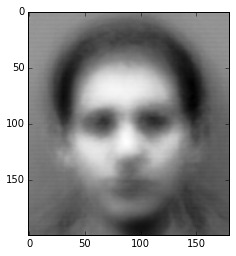

In [5]:
face = FacialRec("faces94")
show(face.mu)

## Difference between Mean face
Plot the difference between the mean face to get the desired image.

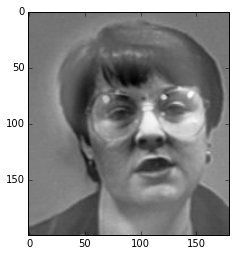

In [6]:
show(face.Fbar[:,0])

## Show Eigenface

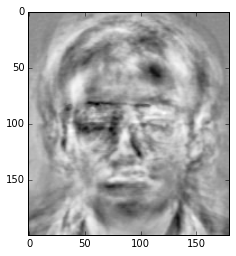

In [7]:
show(face.U[:,38])

## Test and print random faces
Here we will pick random faces from the data set, and show the closest matches with them. If you look closely, you'll notice that some are different photos of the same people. Pretty neat, eh?

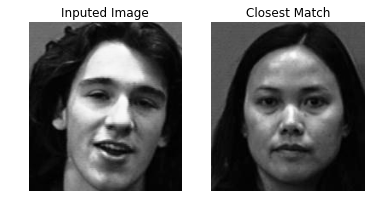

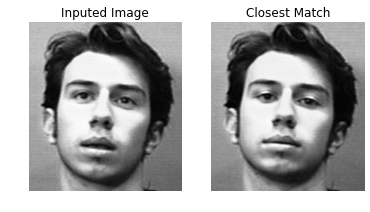

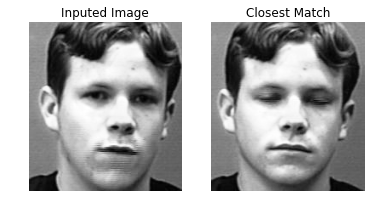

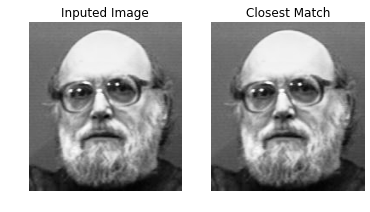

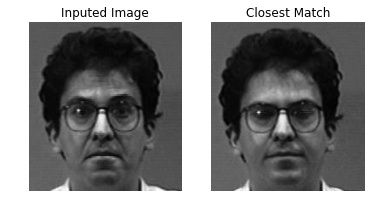

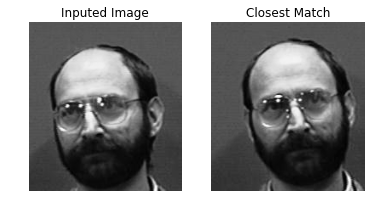

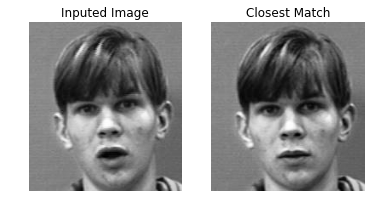

In [8]:
def test1():
    test_images = sampleFaces(7)
    facial = FacialRec("faces94")
    for i in test_images.T:
        a = facial.findNearest(i)
        show2(i, facial.F[:,a])
test1()